# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

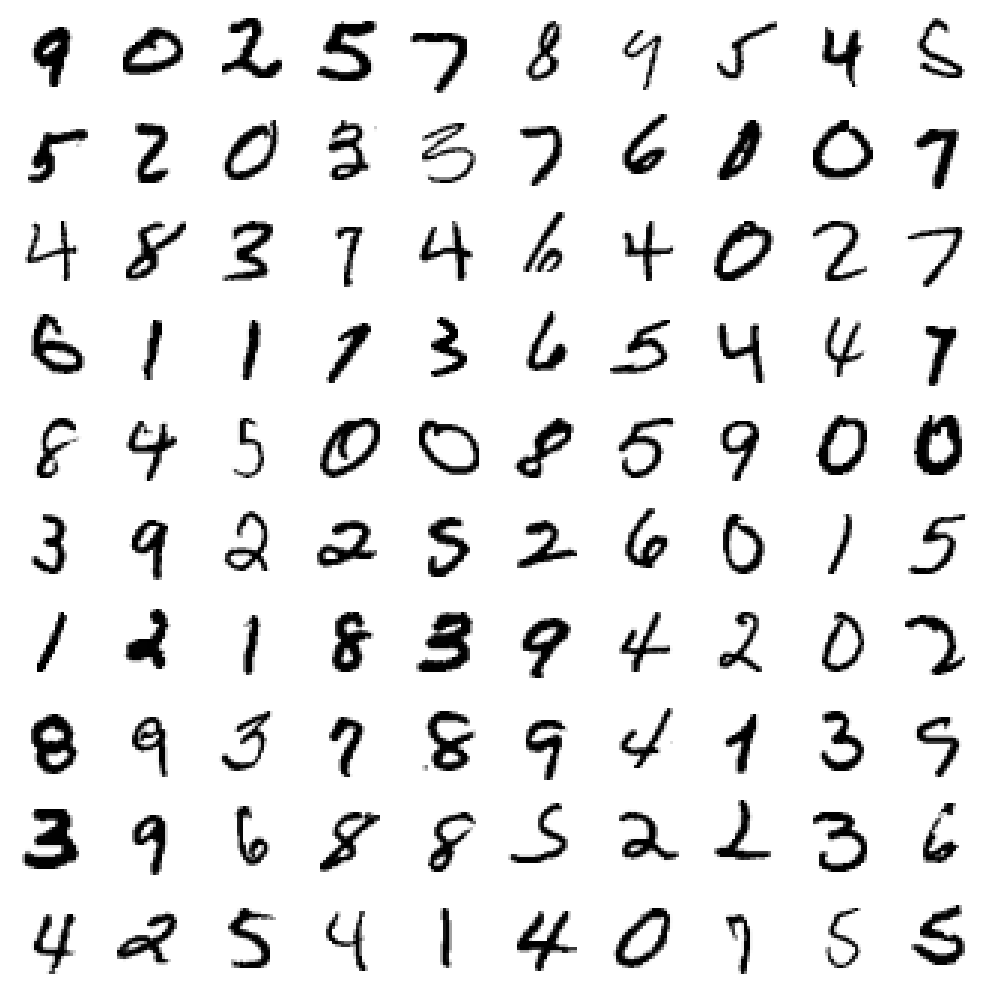

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train_mnist = (x_train_mnist / 255.0).astype(np.float32)
x_test_mnist = (x_test_mnist / 255.0).astype(np.float32)

# convert the data to channel-last
x_train_mnist = np.expand_dims(x_train_mnist, axis=-1)
x_test_mnist = np.expand_dims(x_test_mnist, axis=-1)

# convert the labels to one-hot encoded
y_train_mnist = to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = to_categorical(y_test_mnist, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train_mnist[np.random.randint(0, x_train_mnist.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\tac70\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the network (note that this could take a while).

In [3]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train_mnist, y_train_mnist,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test_mnist, y_test_mnist))

score = model.evaluate(x_test_mnist, y_test_mnist, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 43s 89ms/step - loss: 0.2425 - accuracy: 0.9252 - val_loss: 0.0537 - val_accuracy: 0.9837
Epoch 2/12
469/469 [==============================] - 47s 99ms/step - loss: 0.0864 - accuracy: 0.9747 - val_loss: 0.0446 - val_accuracy: 0.9861
Epoch 3/12
469/469 [==============================] - 44s 95ms/step - loss: 0.0648 - accuracy: 0.9805 - val_loss: 0.0320 - val_accuracy: 0.9888
Epoch 4/12
469/469 [==============================] - 39s 83ms/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 5/12
469/469 [==============================] - 38s 81ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 6/12
469/469 [==============================] - 44s 94ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0320 - val_accuracy: 0.9899
Epoch 7/12
469/469 [==============================] - 47s 100ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0315 - val_accuracy

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [5]:
score = model.evaluate(x_test_mnist, y_test_mnist, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029582872986793518
Test accuracy: 0.991599977016449


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

In [2]:
import sys
sys.path.append('code')  # Add the 'code' folder to the Python path

True
(20, 584, 565, 3)


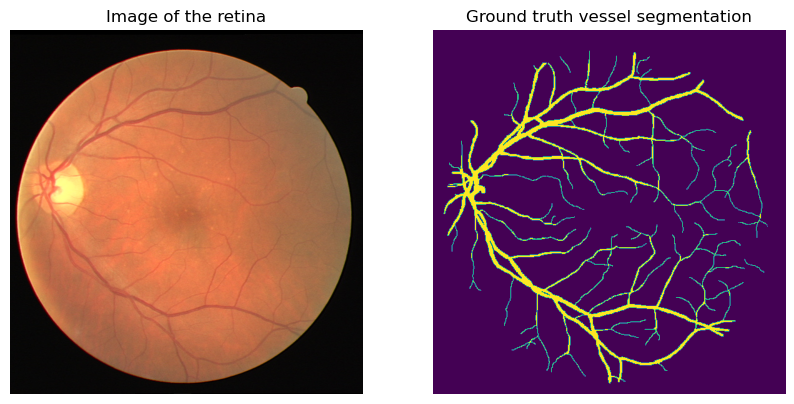

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
from unet_utils import *

# location of the DRIVE dataset
data_folder = 'data/DRIVE/'
train_paths = glob(data_folder + 'training/images/*.tif')
images, masks, segmentations = load_data(train_paths)
import os
print(os.path.exists(data_folder)) 
# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(16, 32, 32, 3)


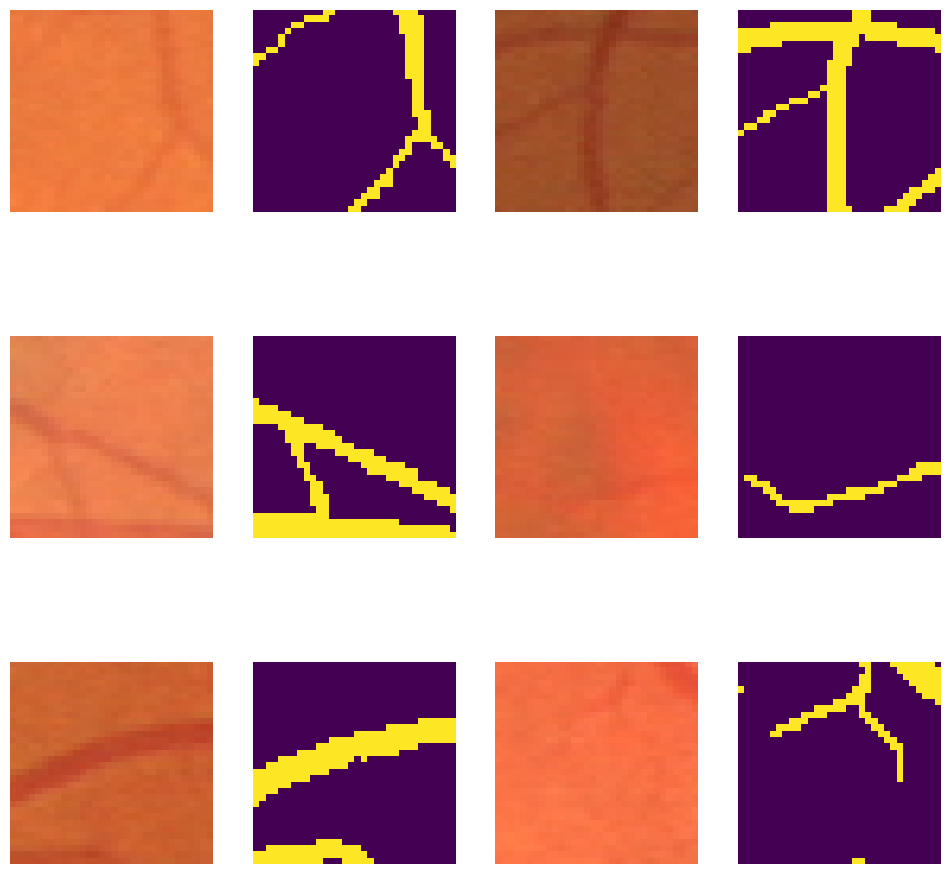

In [14]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [15]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [19]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
#model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 24s - 489ms/step - accuracy: 0.8354 - loss: 0.5072 - val_accuracy: 0.9211 - val_loss: 0.5060
Epoch 2/250
50/50 - 14s - 288ms/step - accuracy: 0.9433 - loss: 0.3484 - val_accuracy: 0.9211 - val_loss: 0.3760
Epoch 3/250
50/50 - 12s - 234ms/step - accuracy: 0.9564 - loss: 0.2346 - val_accuracy: 0.9211 - val_loss: 0.2755
Epoch 4/250
50/50 - 11s - 229ms/step - accuracy: 0.9563 - loss: 0.1982 - val_accuracy: 0.3167 - val_loss: 3.2828
Epoch 5/250
50/50 - 12s - 232ms/step - accuracy: 0.9580 - loss: 0.1697 - val_accuracy: 0.9212 - val_loss: 0.2656
Epoch 6/250
50/50 - 12s - 233ms/step - accuracy: 0.9604 - loss: 0.1467 - val_accuracy: 0.5514 - val_loss: 1.4429
Epoch 7/250
50/50 - 12s - 239ms/step - accuracy: 0.9558 - loss: 0.1458 - val_accuracy: 0.6580 - val_loss: 0.9628
Epoch 8/250
50/50 - 12s - 236ms/step - accuracy: 0.9604 - loss: 0.1351 - val_accuracy: 0.9275 - val_loss: 0.2774
Epoch 9/250
50/50 - 12s - 234ms/step - accuracy: 0.9636 - loss

### Visualizing the segmentation results

1/1 ━━━━━━━━━━━━━━━━━━━━ 44s 44s/step


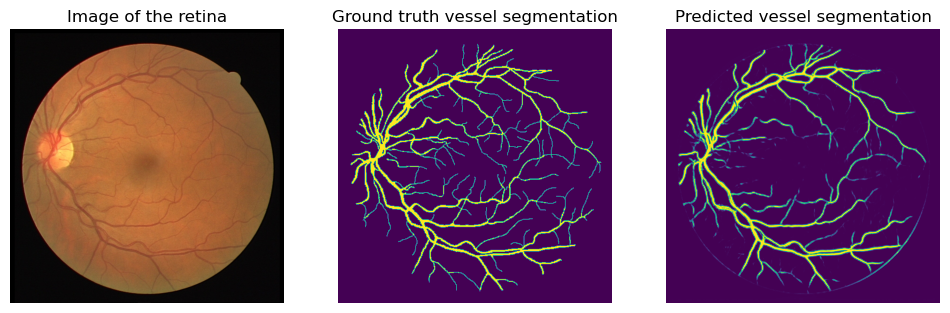

In [44]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises

## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>


## Answer

### (A) Parameters in the MNIST Model

In the MNIST model, each layer's parameters correspond to specific aspects of the neural network's structure and function.

#### First Convolutional Layer (320 Parameters)
The first convolutional layer is defined with 32 filters of size \(3 × 3\), using a single input channel (grayscale). 

- **Kernel Parameters (Weights):** Each filter has \(3 × 3 = 9\) weights. With 32 filters, this results in:
  $$
  32 × 9 = 288 \text{ weights}
  $$

- **Bias Parameters:** Each filter has an associated bias term, so there are 32 biases.

Adding these together:
$$
288 + 32 = 320 \text{ parameters}
$$

#### First Fully Connected Layer (1,179,776 Parameters)
The fully connected (Dense) layer takes all neurons from the preceding Flatten layer (after convolutional and pooling layers) as input. Given the structure of the network:

- **Input Neurons:** After the convolutional and pooling layers, the input to this Dense layer is \(12 × 12 × 64 = 9216\) neurons (each corresponding to one value in the \(12 × 12 × 64\) output feature map from the previous layer).

- **Weight Parameters:** Each of the 9216 input neurons is connected to each of the 128 neurons in the Dense layer, so:
  $$
  9216 × 128 = 1,179,648 \text{ weights}
  $$

- **Bias Parameters:** Each of the 128 neurons in the Dense layer has an associated bias, adding 128 more parameters.

Summing these:
$$
1,179,648 + 128 = 1,179,776 \text{ parameters}
$$

Given the above breakdown, we say that for -
- **Convolutional Layers:** The parameters consist of filter weights and biases, which are used to detect patterns in small regions of the input.
- **Fully Connected (Dense) Layers:** Parameters represent connections between each input and output neuron, enabling complex feature mappings.

### (B) General Expression for Parameter calculation

#### 1. Convolutional Layer
For a convolutional layer, the number of parameters is determined by the filter size, the number of input channels, and the number of filters. The general formula is:

$$
\text{Number of Parameters} = (f_h \times f_w \times C_{\text{in}} + 1) \times C_{\text{out}}
$$

where:
- $f_h$ and $f_w$ are the height and width of each filter,
- $C_{\text{in}}$ is the number of input channels (e.g., 1 for grayscale images, 3 for RGB),
- $C_{\text{out}}$ is the number of filters (output channels),
- $+1$ accounts for the bias term associated with each filter.

**Example (First Convolutional Layer in MNIST Model):**  
For the first convolutional layer with 32 filters of size $3 \times 3$ and a single input channel:
$$
\text{Number of Parameters} = (3 \times 3 \times 1 + 1) \times 32 = (9 + 1) \times 32 = 320
$$

#### 2. Fully-Connected (Dense) Layer
For a fully-connected layer, the number of parameters depends on the number of input neurons and the number of output neurons. The general formula is:

$$
\text{Number of Parameters} = (N_{\text{in}} \times N_{\text{out}}) + N_{\text{out}}
$$

where:
- $N_{\text{in}}$ is the number of input neurons (flattened input size),
- $N_{\text{out}}$ is the number of output neurons,
- $+N_{\text{out}}$ accounts for the bias term for each output neuron.

**Example (First Fully Connected Layer in MNIST Model):**  
For the first fully connected layer with 9216 input neurons and 128 output neurons:
$$
\text{Number of Parameters} = (9216 \times 128) + 128 = 1,179,648 + 128 = 1,179,776
$$

## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally. 


In [51]:
# Convolutional Model (CNN)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\tac70\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Fully Convolutional Model (FCN)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model_fcn = Sequential()
model_fcn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_fcn.add(Conv2D(64, (3, 3), activation='relu'))
model_fcn.add(MaxPooling2D(pool_size=(2, 2)))
model_fcn.add(Dropout(0.25))
model_fcn.add(Conv2D(128, (12, 12), activation='relu'))
model_fcn.add(Dropout(0.5))
model_fcn.add(Conv2D(10, (1, 1), activation='softmax'))
model_fcn.add(Flatten())
# model_fcn.add(Activation('softmax'))

model_fcn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_82 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 1, 1, 128)      │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 1, 1, 10)       │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model_fcn.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train_mnist, y_train_mnist,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test_mnist, y_test_mnist))
model_fcn.fit(x_train_mnist, y_train_mnist,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test_mnist, y_test_mnist))

score = model.evaluate(x_test_mnist, y_test_mnist, verbose=0)
score_fcn = model_fcn.evaluate(x_test_mnist, y_test_mnist, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('-----------------------')

print('Test loss:', score_fcn[0])
print('Test accuracy:', score_fcn[1])

Test loss: 0.028649283573031425
Test accuracy: 0.9921000003814697
-----------------------
Test loss: 0.027467522770166397
Test accuracy: 0.9915000200271606


### Explanation

The first Fully Connected (Dense) layer contributes 1,179,776 parameters to the model. This number is calculated by the previously given $(N_{\text{in}} \times N_{\text{out}}) + N_{\text{out}}$ formula. The current Dense layer has 128 neurons, therefore the formula can be updated as (N_{\text{out}} \times 128)+128 = 1,179,776. The number of neurons in the previous Convolutional layer (Conv2D) is calculated as $(f_h \times f_w \times C_{\text{in}} + 1)$. Through solving the first formula, it can be seen that number of neurons in the previous convolutional layer is 9216, and the number of filters is 64. Which means that $f_h \times f_w$ must equate 144. This can be done through the use of a $12 \times 12$ filter. 

To replace the second fully connected layer with a convolutional layer, the layer must add 1290 parameters. Since this is the final layer, the output dimension must be equal to the number of classes, and so 10 filters should be used. The previous layer has 128 filters, and this leaves us with the use of filters with 1x1 kernel size. Hence, this layer could be replaced with a convolutional layer of 10 filters, each with dimensions 1x1, and with the softmax activation function. 

When the models are trained and tested on the same dataset, the final accuracy of the models are very similar after 12 epochs; with the original CNN model scoring 0.9922 and the modified Fully Convolutional model (FCN) scoring 0.9929. However, the FCN model lead to a higher loss of 0.0308 while CNN had a loss of 0.0268. 

## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>


Skip connections play a crucial role in improving the network's performance in the U-Net architecture.
As the input data moves through the encoder part of the U-Net, spatial resolution decreases while feature abstraction increases. This loss of spatial detail could harm the network's ability to produce fine-grained signals. The skip connections concatenate feature maps from the encoder to the target in the decoder, allowing the network to retain spatial information that might be lost during downsampling.
Additionally, skip connections help the network produce more precise and context-aware segmentations as well as help the model converge fast.

It is possible to train the U-Net architecture with the skip connections omitted, but the performance would likely be worse.
As expected, without skip connections, the high-resolution features from earlier layers in the encoder are not preserved and transferred to the decoder. This way, the decoder would rely solely on low-resolution abstracted features after downsampling. This results in less accurate spatial reconstruction during upsampling, leading to blurry or less precise segmentations. Removing these connections might also lead to slower convergence.


## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>


Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above. 

Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.


In [56]:
import numpy as np

def random_brightness(image, max_delta=0.3):
    """Apply random brightness augmentation to an image."""
    delta = np.random.uniform(-max_delta, max_delta)
    image = image + delta
    image = np.clip(image, 0, 1)  # Ensure the values are within [0, 1]
    return image

# Apply the augmentation to the training images
train_images_augmented = np.array([random_brightness(img) for img in train_images])

In [57]:
# Train the model with brightness augmentation
history_brightness = model.fit(train_images_augmented, train_segmentations,
                               validation_data=(val_images, val_segmentations),
                               epochs=50, batch_size=16)

# Evaluate the model
score_brightness = model.evaluate(val_images, val_segmentations, verbose=0)
print('Test loss with brightness augmentation:', score_brightness[0])
print('Test accuracy with brightness augmentation:', score_brightness[1])

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_80" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (16, 584, 565, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 584, 565, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
import gryds

def b_spline_augmentation(image, control_points=5, std=0.1):
    """Apply b-spline geometric augmentation to an image."""
    grid = gryds.BSplineTransformation(control_points, std)
    augmented_image = grid.transform(image)
    return augmented_image

# Apply the augmentation to the training images
train_images_augmented_b_spline = np.array([b_spline_augmentation(img) for img in train_images])

In [ ]:
def combined_augmentation(image):
    """Apply both random brightness and b-spline geometric augmentation to an image."""
    image = random_brightness(image)
    image = b_spline_augmentation(image)
    return image

# Apply the combined augmentation to the training images
train_images_combined_augmented = np.array([combined_augmentation(img) for img in train_images])

In [ ]:
# Train the model with combined augmentation
history_combined = model.fit(train_images_combined_augmented, train_segmentations,
                             validation_data=(val_images, val_segmentations),
                             epochs=50, batch_size=16)

# Evaluate the model
score_combined = model.evaluate(val_images, val_segmentations, verbose=0)
print('Test loss with combined augmentation:', score_combined[0])
print('Test accuracy with combined augmentation:', score_combined[1])

In [ ]:
print('Baseline model:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('Model with brightness augmentation:')
print('Test loss:', score_brightness[0])
print('Test accuracy:', score_brightness[1])

print('Model with combined augmentation:')
print('Test loss:', score_combined[0])
print('Test accuracy:', score_combined[1])

### Explanation

## Why Data Augmentation Results in Less Overfitting

Data augmentation helps reduce overfitting by artificially increasing the size and diversity of the training dataset for the following reasons:

**Increased Data Variety:** By applying random transformations (like rotations, flips, brightness changes, etc.), the model is exposed to a wider variety of data. This helps the model generalize better to new, unseen data rather than memorizing the training data.

**Regularization Effect:** Augmentation acts as a form of regularization. It prevents the model from becoming too reliant on specific features of the training data, thus reducing the risk of overfitting.

**Improved Robustness:** The model learns to be invariant to certain transformations, making it more robust to variations in the input data.


## Can Data Augmentation Be Applied to Test Samples?

No, data augmentation should not be applied to test samples. Here’s why:

**Evaluation Consistency:** The purpose of the test set is to evaluate the model’s performance on unseen data. Applying augmentation to test samples would alter the data, making it difficult to get a true measure of the model’s performance.

**Standardized Metrics:** For fair comparison and benchmarking, the test data should remain consistent and unaltered. This ensures that the evaluation metrics are standardized and comparable across different models and experiments.


However, there is a concept called test-time augmentation (TTA) which can be used in a specific context:
Test-Time Augmentation (TTA)

TTA involves applying augmentations to test samples and then averaging the predictions. This can help improve the robustness of the predictions. Here’s how it works:

**Multiple Predictions:** Apply different augmentations to each test sample and make multiple predictions.

**Averaging:** Average the predictions to get a final result.

The goal of TTA is to leverage the model’s robustness to augmentations to improve prediction accuracy. However, this is not the same as applying augmentation during training and should be used carefully to avoid introducing bias